# Import local .csv

In [35]:
import pandas as pd

%reload_ext autoreload
%autoreload 2

df = pd.read_csv('cust_act1.csv')

df.skew(numeric_only=True)

administrative              1.930426
administrative_duration     4.666608
informational               3.201809
informational_duration      7.202650
product_related             3.321367
product_related_duration    3.643645
bounce_rates                2.949097
exit_rates                  2.194420
page_values                 6.023549
weekend                     1.450999
revenue                     1.908652
dtype: float64

# Perform column dtype transform

In [36]:
from db_utils import DataTransform
from db_utils import DataFrameInfo as dfinfo

display(df.info())
print("Here's the no. of null values in each column:\n", df.isna().sum())
dtype_change = {
    "visitor_type": "category",
    "traffic_type": "category",
    "region": "category",
    "browser": "category",
    "operating_systems": "category",
    # "months": "category" -- Special case
    "administrative": "Int32",
    "informational": "Int32",
    "product_related": "Int32"
}

""" dfinfo(df, 'operating_systems').unique()
print("\n", df['operating_systems'].value_counts())
print(df['operating_systems'].isna().sum()) """

# Perform special transform case for months to be an ordered category
months_ordered = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=months_ordered, ordered=True)
# Perform the transform from dict
df = DataTransform(df).changetype(dtype_change)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            11760 non-null  float64
 1   administrative_duration   11418 non-null  float64
 2   informational             12330 non-null  int64  
 3   informational_duration    11994 non-null  float64
 4   product_related           11751 non-null  float64
 5   product_related_duration  12129 non-null  float64
 6   bounce_rates              12330 non-null  float64
 7   exit_rates                12330 non-null  float64
 8   page_values               12330 non-null  float64
 9   month                     12330 non-null  object 
 10  operating_systems         12319 non-null  object 
 11  browser                   12330 non-null  object 
 12  region                    12330 non-null  object 
 13  traffic_type              12330 non-null  object 
 14  visito

None

Here's the no. of null values in each column:
 administrative              570
administrative_duration     912
informational                 0
informational_duration      336
product_related             579
product_related_duration    201
bounce_rates                  0
exit_rates                    0
page_values                   0
month                         0
operating_systems            11
browser                       0
region                        0
traffic_type                  0
visitor_type                  0
weekend                       0
revenue                       0
dtype: int64
Successfully changed 'visitor_type' to category
Successfully changed 'traffic_type' to category
Successfully changed 'region' to category
Successfully changed 'browser' to category
Successfully changed 'operating_systems' to category
Successfully changed 'administrative' to Int32
Successfully changed 'informational' to Int32
Successfully changed 'product_related' to Int32
<class 'pandas.core.f

# Display No. and % of Null values

In [37]:
# print(f"\tNo. null:\n\n{df.isna().sum()}\n\n\tPercent Null:\n\n{(df.isna().sum())/len(df)*100}")

nulldf = dfinfo(df).null()
display(nulldf)

dfinfo(df, 'informational').unique()
#df.loc[nulldf['ColumnName']=='informational']
print('\n')
dfinfo(df, 'administrative').unique()
print(df['administrative'].value_counts())
print('\n')
dfinfo(df, 'browser').unique()
print('\n')
dfinfo(df, 'product_related').unique()
print('\n')
dfinfo(df, 'traffic_type').unique()

print(df.isna().sum())


,ColumnName,CountNull,PercentageNull
0,administrative,570,4.62
1,administrative_duration,912,7.40
2,informational,0,0.00
3,informational_duration,336,2.73
4,product_related,579,4.70
5,product_related_duration,201,1.63
6,bounce_rates,0,0.00
7,exit_rates,0,0.00
8,page_values,0,0.00
9,month,0,0.00


Here are the unique values in 'informational':
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


Here are the unique values in 'administrative':
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, <NA>}
administrative
0     5644
1     1237
2     1018
3      885
4      661
5      541
6      401
7      314
8      259
9      227
10     165
11      97
12      93
13      65
14      42
15      37
16      25
17      15
18      14
21       5
19       5
23       4
24       4
20       2
Name: count, dtype: Int64


Here are the unique values in 'browser':
{'Mozilla Firefox', 'Microsoft Edge', 'Sogou Explorer', 'UC Browser', 'Internet Explorer', 'Safari', 'Google Chrome', 'Opera', 'Yandex', 'QQ', 'Undetermined', 'Samsung Internet', 'Android'}


Here are the unique values in 'product_related':
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,

# Imputation Time

In [39]:
from db_utils import DataFrameTransform as dft

%reload_ext autoreload
%autoreload 2

cols_to_impute = [
    "product_related_duration",
    "informational_duration",
    "administrative_duration"
]
cols_to_drop = [
    "operating_systems"
]
cols_to_mode = [
    "administrative",
    "product_related"
]

dft(df, cols_to_drop).drop_missing()
dft(df, cols_to_impute).impute_missing()
dft(df, cols_to_mode).impute_missing(strategy="mode")

dfinfo(df).null()

Dropped 0 rows with missing values in ['operating_systems'].


,ColumnName,CountNull,PercentageNull
0,administrative,0,0.0
1,administrative_duration,0,0.0
2,informational,0,0.0
3,informational_duration,0,0.0
4,product_related,0,0.0
5,product_related_duration,0,0.0
6,bounce_rates,0,0.0
7,exit_rates,0,0.0
8,page_values,0,0.0
9,month,0,0.0


# Skewness Reduction Transformations

Original DataFrame:


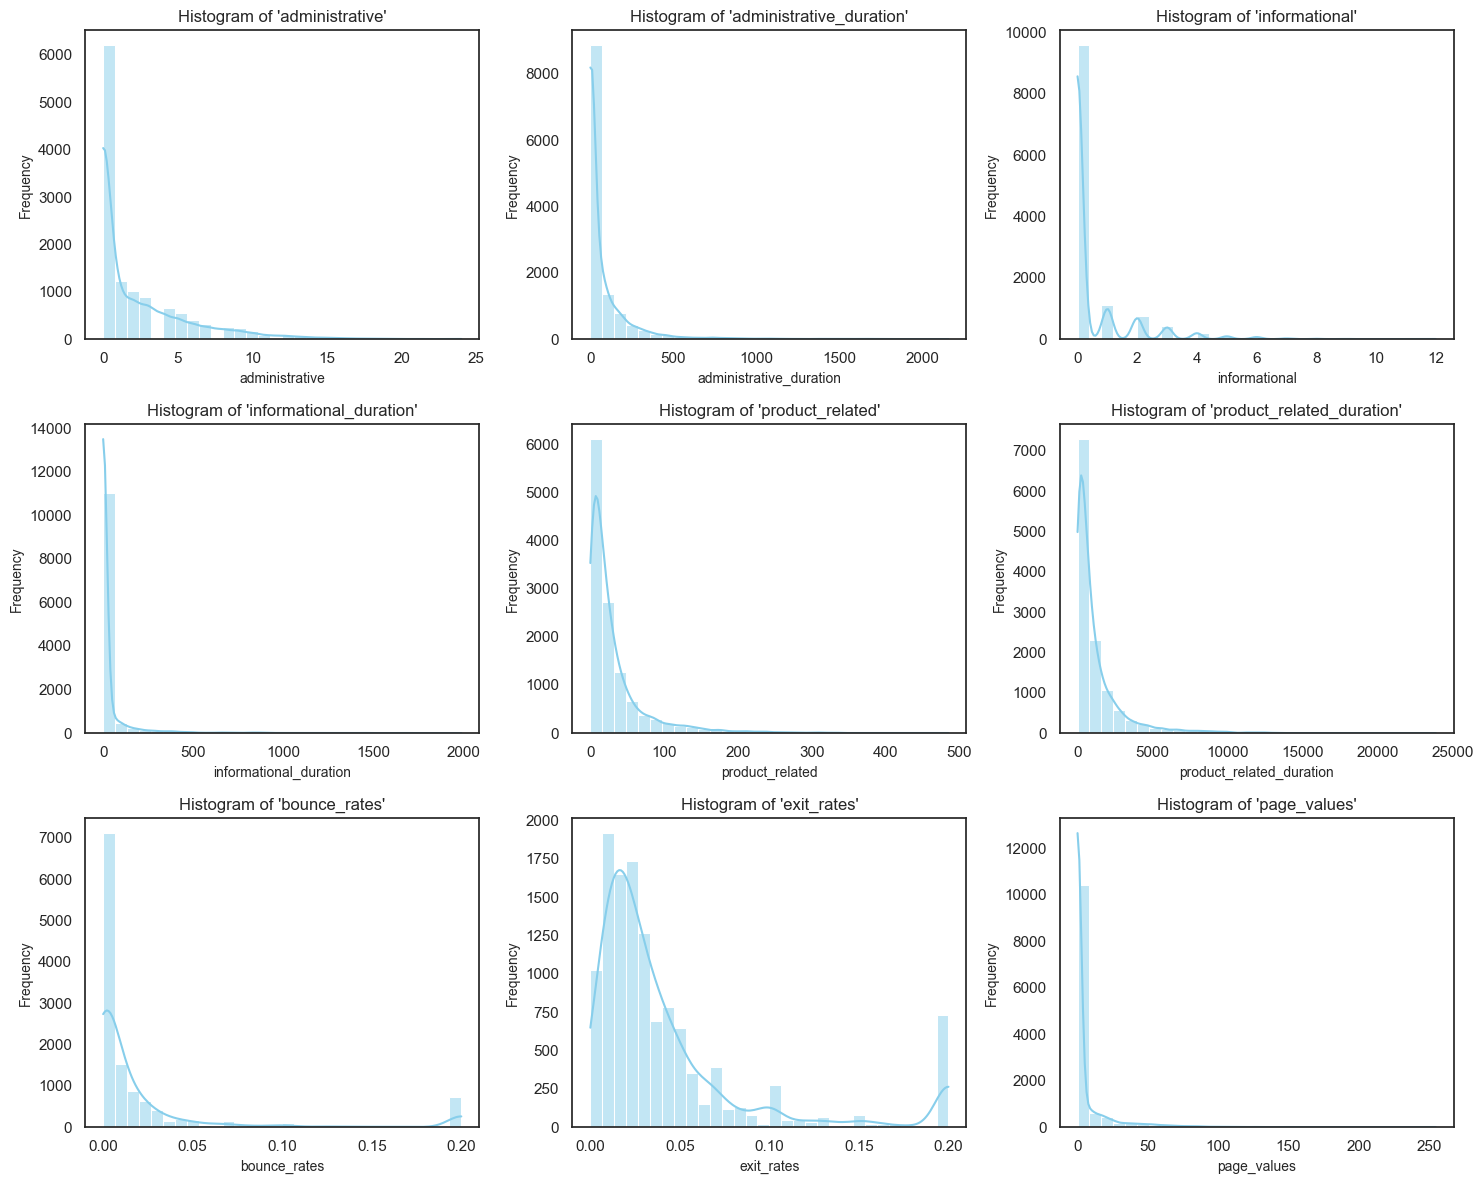


Log-Transformed DataFrame:


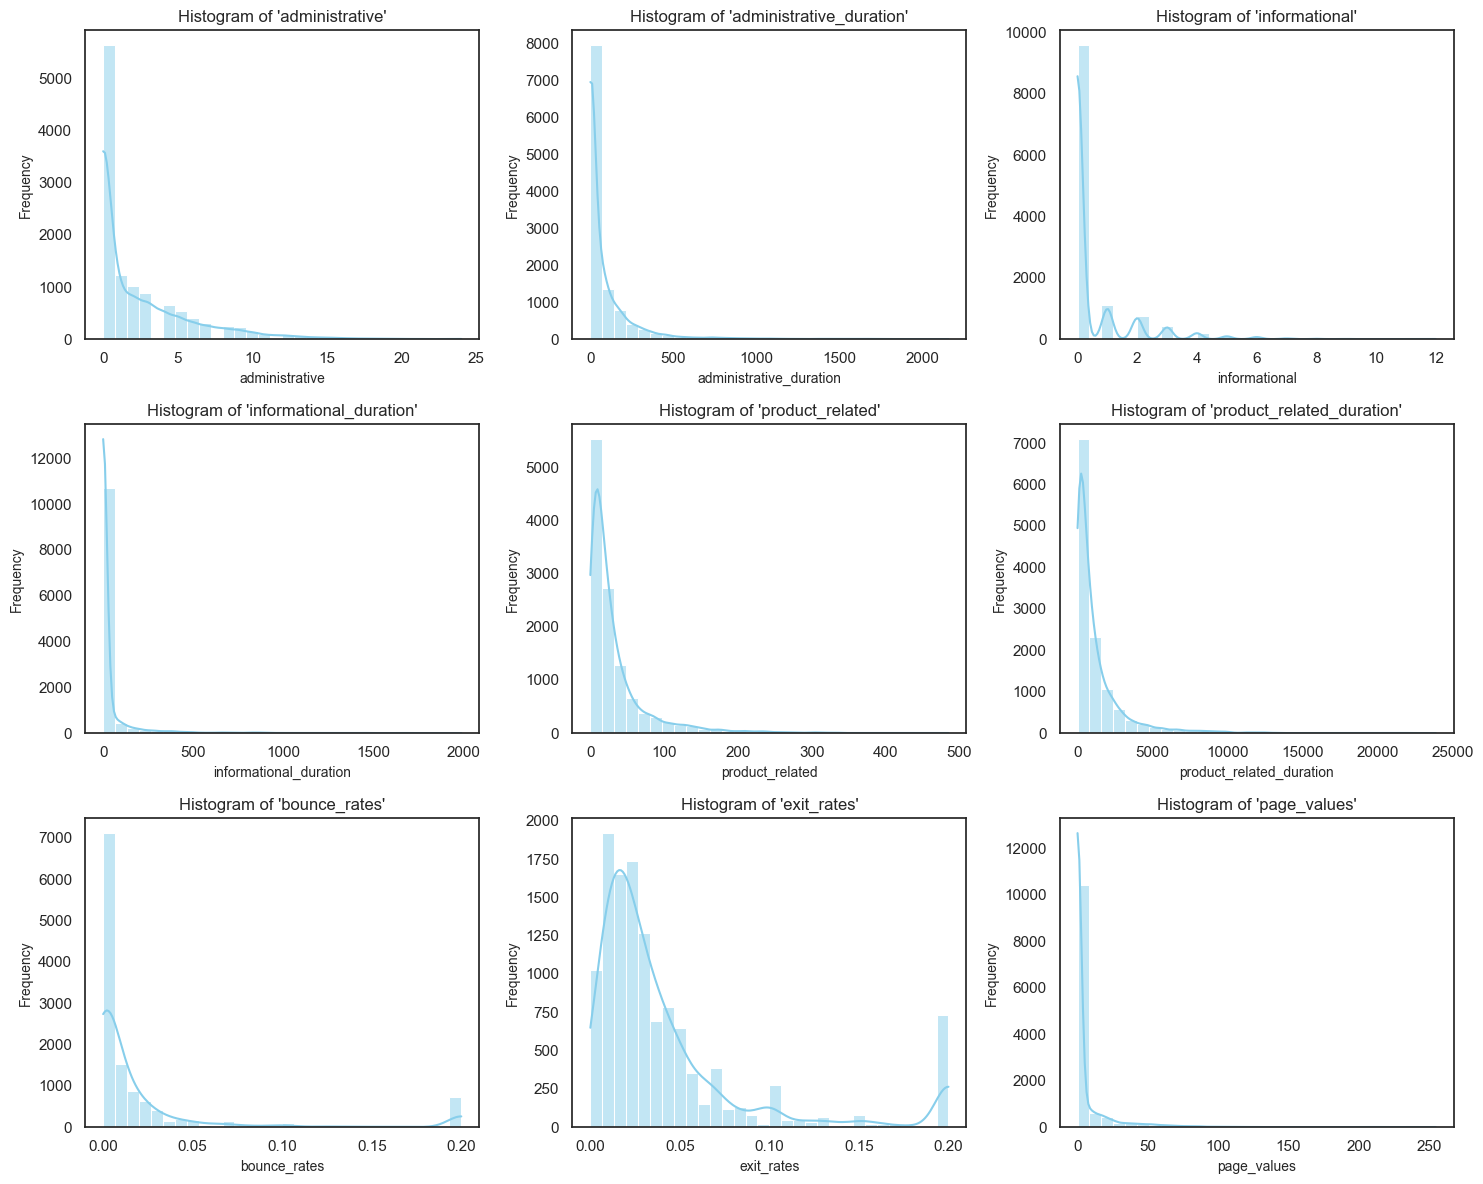


Power-Transformed DataFrame:


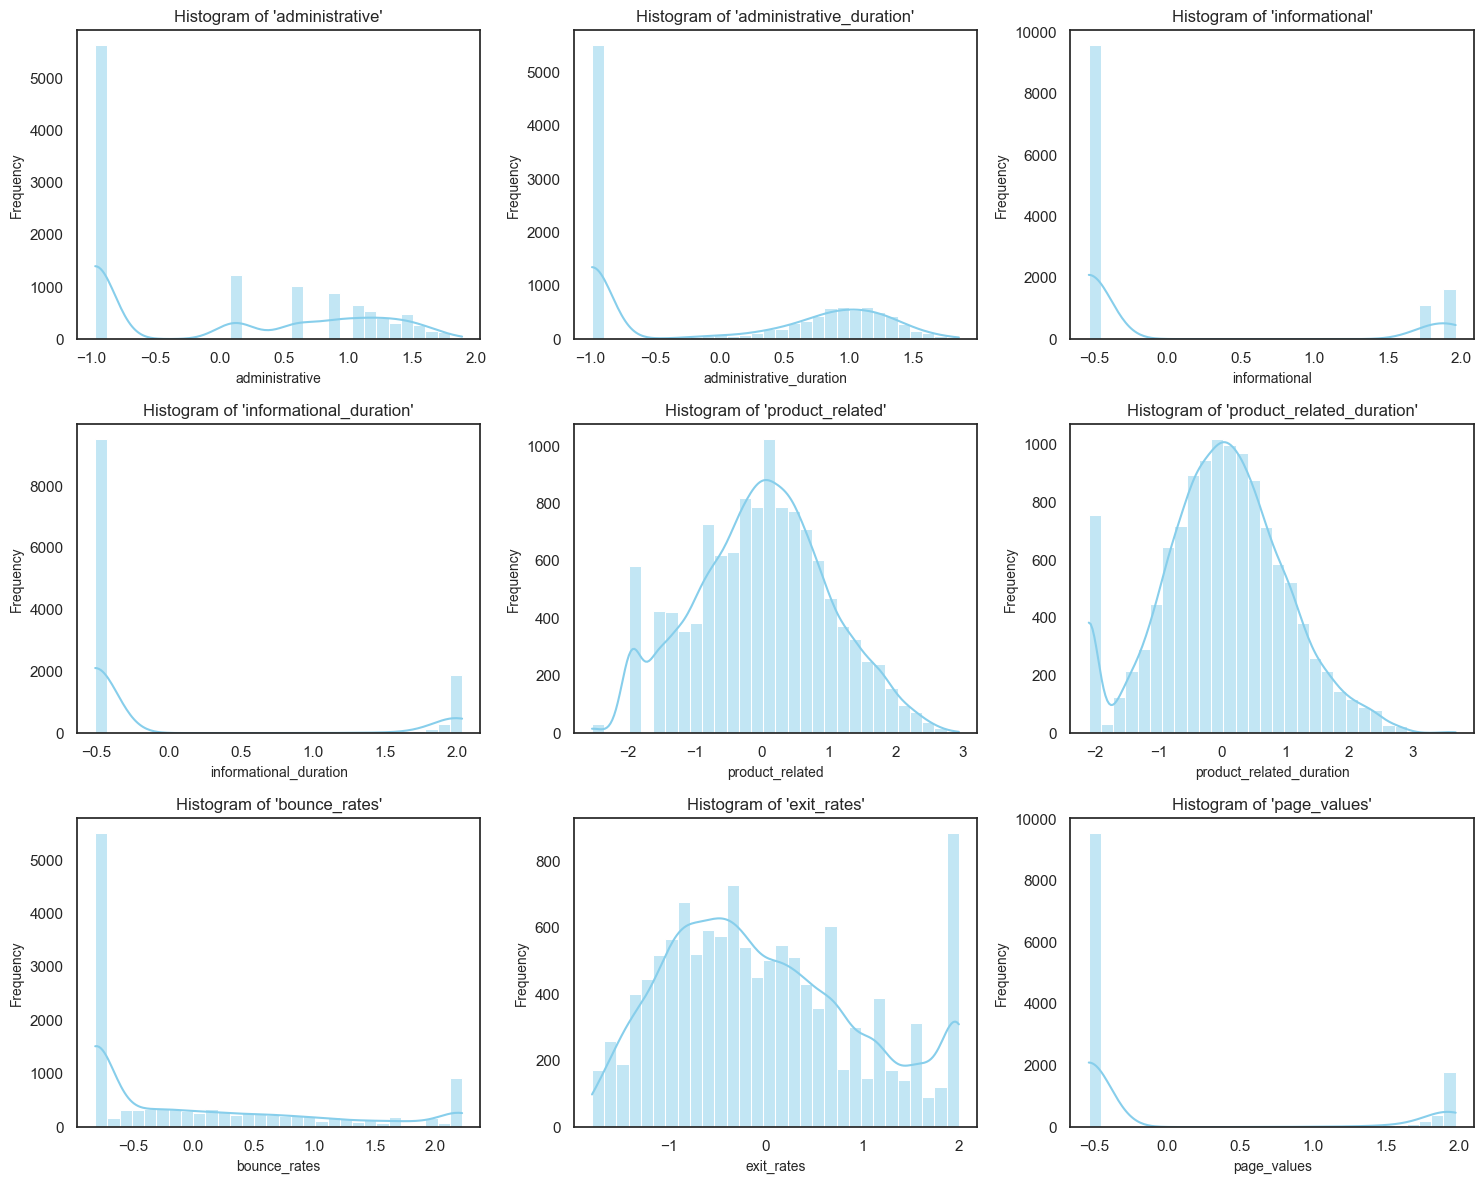

In [30]:
from db_utils import Plotter

df.skew(numeric_only=True)

print("Original DataFrame:")
Plotter(df).numeric_distributions()

# Apply log transformation
log_transformed_df = dft(df).reduce_skewness(method='log')
print("\nLog-Transformed DataFrame:")
Plotter(log_transformed_df).numeric_distributions()

# Apply PowerTransformer
power_transformed_df = dft(df).reduce_skewness(method='power')
print("\nPower-Transformed DataFrame:")
Plotter(power_transformed_df).numeric_distributions()



# Outlier Purge

### Before:

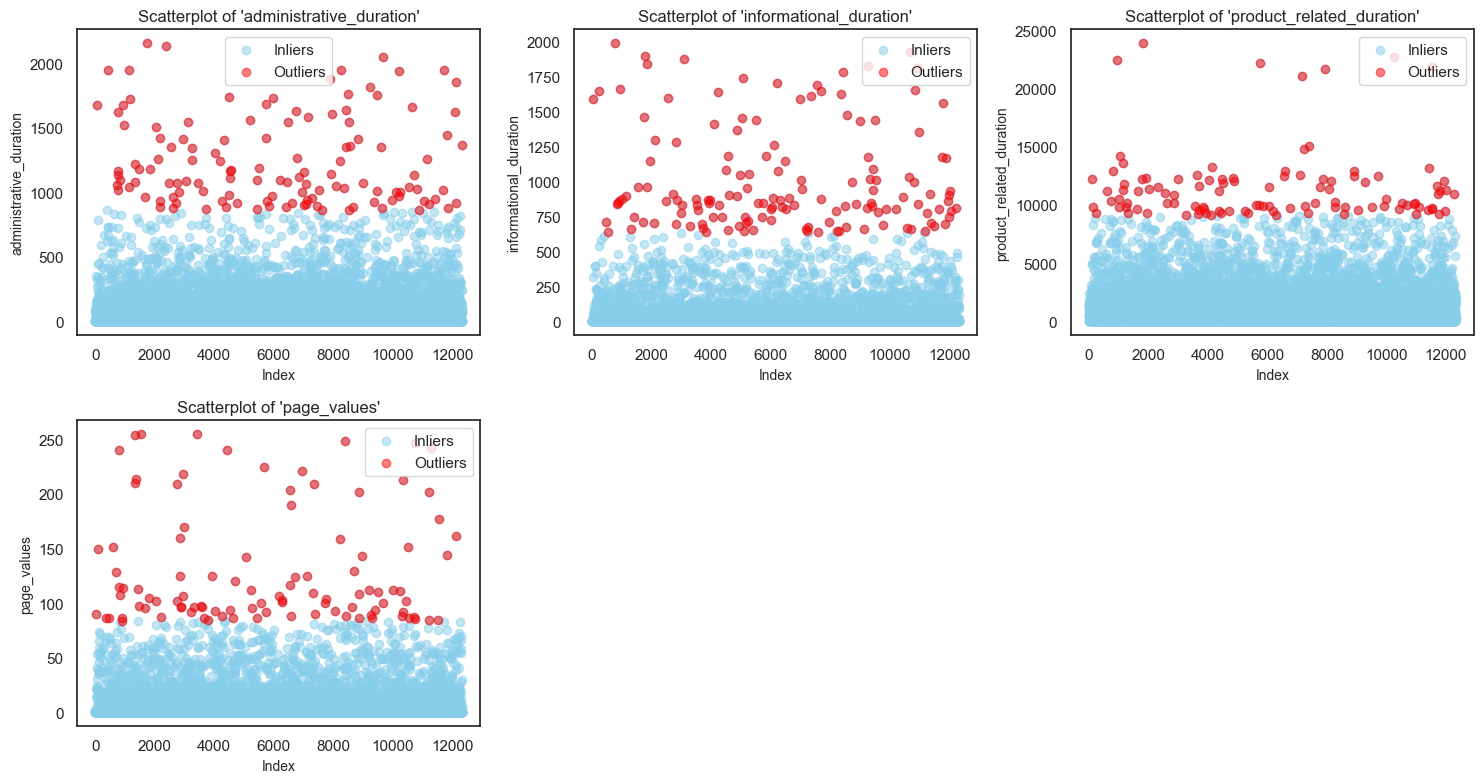

,Column,Z-Score Outliers,Z Percentage,IQR Outliers,IQR Percentage
0,administrative_duration,125,1.014693,1298,10.536570
1,informational_duration,145,1.177044,2471,20.058446
2,product_related_duration,107,0.868577,1054,8.555889
3,page_values,101,0.819872,2779,22.558649


In [42]:
cols_with_outliers = [
    "administrative_duration",
    "informational_duration",
    "product_related_duration",
    "page_values"
]

Plotter(df).numeric_distributions(columns=cols_with_outliers, plot_type='scatter', z_threshold=4.5)

dfinfo(df, cols_with_outliers).count_outliers(z_treshold=4.5)

### Perform removal, assign to new dataframe

In [43]:
df_sans_outliers = dft(df, columns=cols_with_outliers).drop_outliers(z_threshold=4.5)

### After:

/Users/kiprs/Documents/code_school/py/learning-journey-AICore/Retail EDA 1.1/exploratory-data-analysis---online-shopping-in-retail986/db_utils.py:468: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.ylabel(col, fontsize=10)


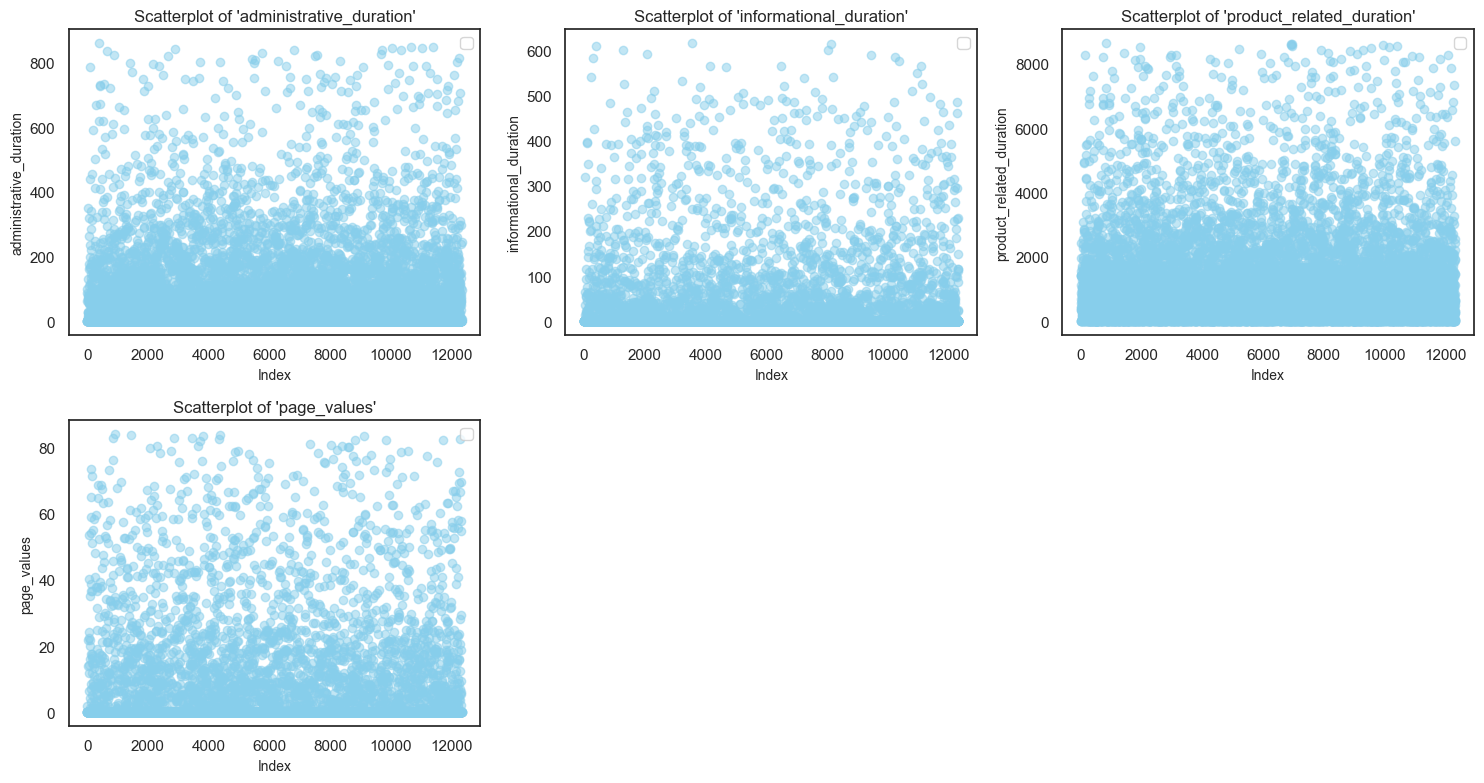

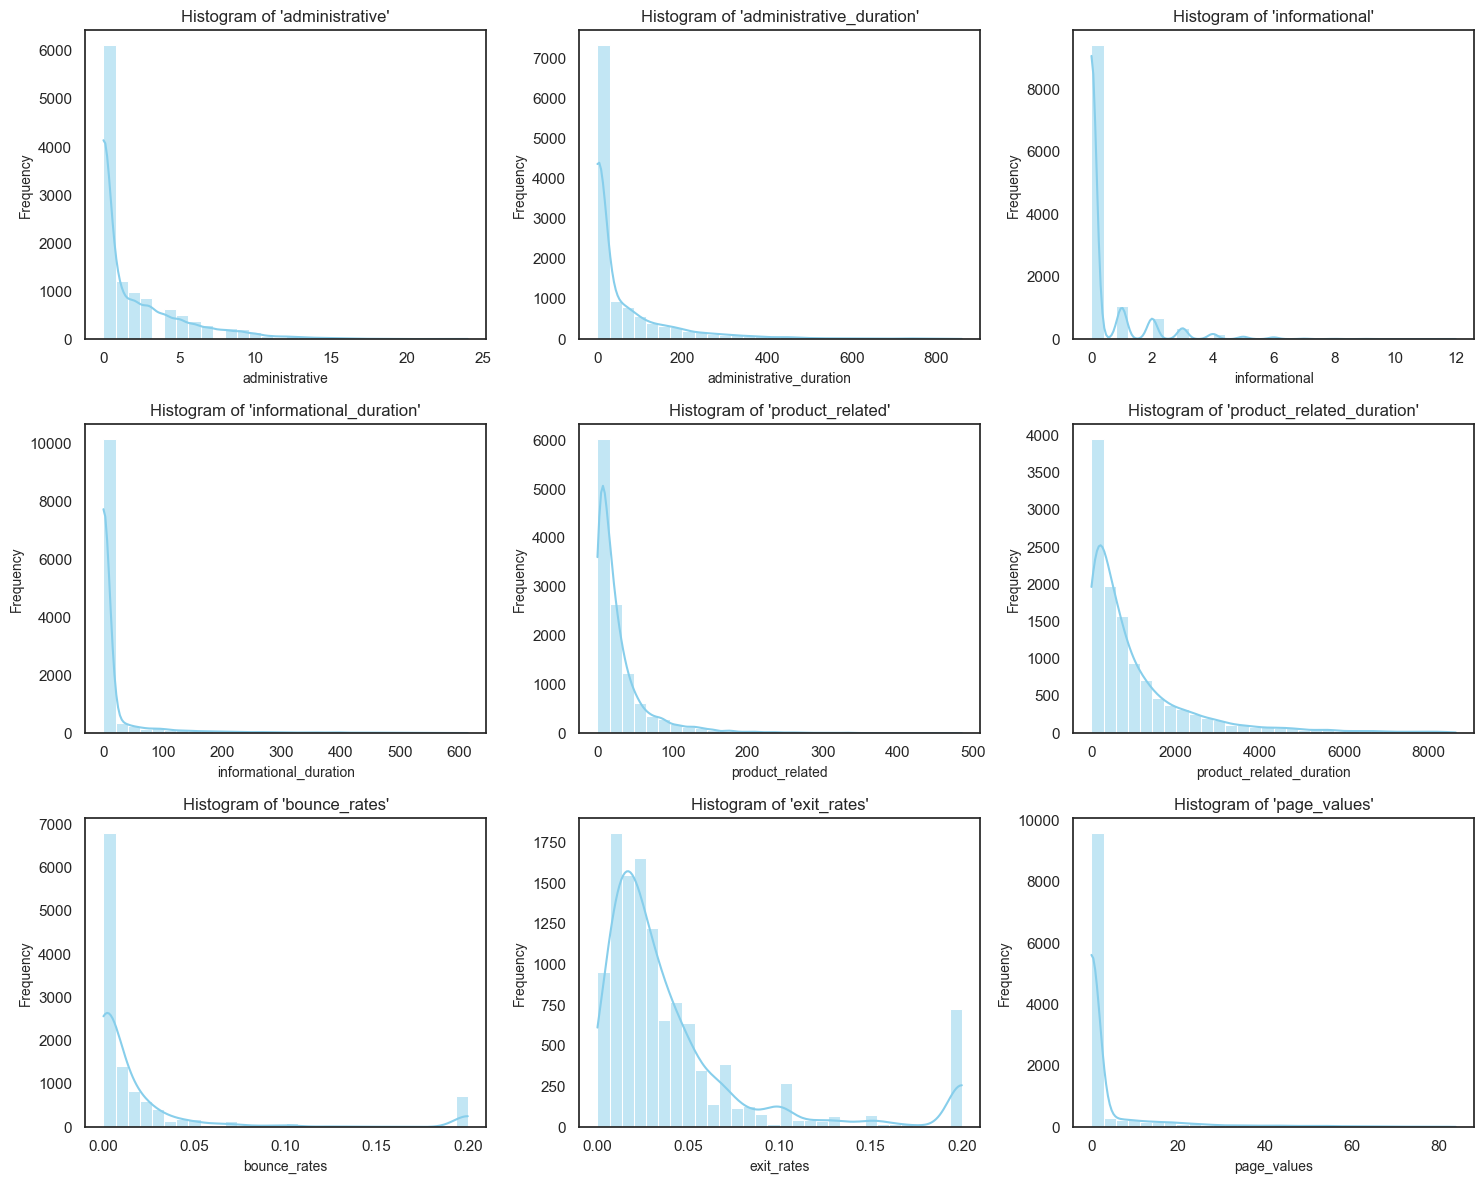

In [44]:
%reload_ext autoreload
%autoreload 2

Plotter(df_sans_outliers).numeric_distributions(columns=cols_with_outliers, plot_type='scatter', highlight_outliers=False)
Plotter(df_sans_outliers).numeric_distributions(plot_type='hist')

# Visualise Correlation Heatmap

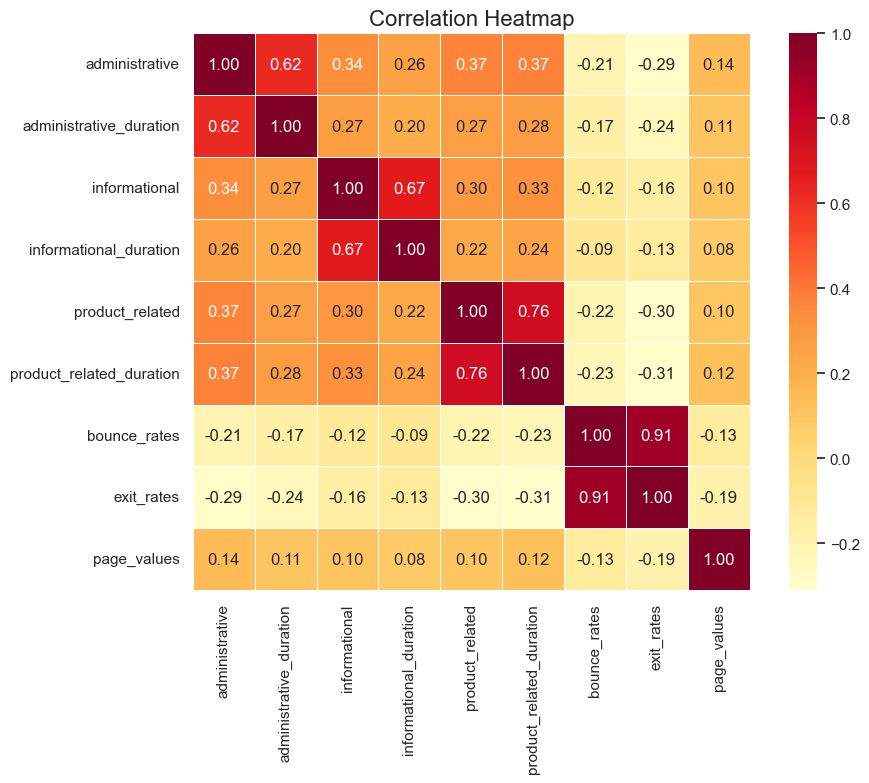

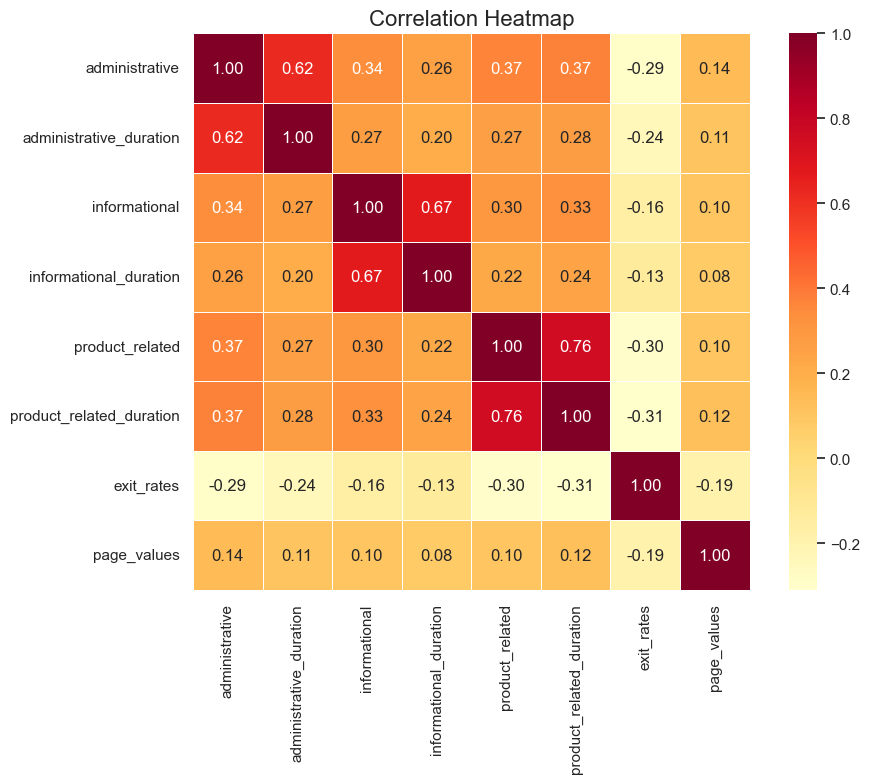

In [45]:
%reload_ext autoreload
%autoreload 2

plot = Plotter(df_sans_outliers)
plot.correlation_map()

if "bounce_rates" in df_sans_outliers.columns:
    df_sans_outliers = df_sans_outliers.drop(columns="bounce_rates")

plot = Plotter(df_sans_outliers)
plot.correlation_map()


# Missingness Correlation

Plot whether missing values in one column correlate with missing values in other columns.

*Spoiler alert: there doesn't seem to be correlation.*

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_null_correlation_heatmap(df):
    """
    Creates a heatmap showing correlations between missingness indicators for columns.
    Filters columns with no missing values and reorders them for better clarity.

    Args:
        df (pd.DataFrame): The dataframe to analyze.
    """
    # Create a missingness indicator DataFrame
    null_indicator = df.isnull()
    
    # Filter columns with at least some missing values
    missing_cols = null_indicator.loc[:, null_indicator.any()].columns
    
    # Subset to columns with missing values
    null_corr = null_indicator[missing_cols].corr()
    
    # Sort columns to cluster similar missingness patterns
    sorted_columns = null_corr.sum().sort_values(ascending=False).index
    null_corr = null_corr.loc[sorted_columns, sorted_columns]
    
    # Plot the heatmap
    plt.figure(figsize=(12, 10))  # Adjust the figure size for readability
    sns.heatmap(
        null_corr,
        cmap="coolwarm",  # Use a visually intuitive color map
        annot=True,       # Add annotations
        fmt=".2f",        # Format annotations with 2 decimal points
        linewidths=0.5,   # Add space between cells
        cbar_kws={'label': 'Correlation'}
    )
    plt.title("Correlation of Missingness Between Columns", fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for clarity
    plt.yticks(fontsize=10)  # Adjust y-axis label font size
    plt.tight_layout()
    plt.show()

plot_null_correlation_heatmap(df)


# Browser per Region

In [ ]:
import plotly.express as px

fig = px.histogram(df, "browser", 
                   facet_col="operating_systems", 
                   color="operating_systems",
                   title="Counts of browser per operating_systems",
                   labels={"browser": "browser"},
                   height=1000, 
                   facet_col_wrap=2, 
                   facet_col_spacing=0.1,
                   histnorm='probability'
                   )
fig.update_layout(showlegend=False, xaxis={'categoryorder':'total descending'})
fig.update_yaxes(matches=None, showticklabels=True)
# fig.update_xaxes(showticklabels=True)
fig.show()

# Chart Boilerplate Collection

#### 1. Transparent Circle Scatter Plot

In [ ]:
# This is copied straight from another db analysis.
# TODO all variables and categories must be replaced with relevant ones.

category_array = ["I have never written code", "< 1 years", "1-2 years", "3-5 years", "5-10 years", "10-20 years", "20+ years"]
# fig = px.scatter(programming_experience_salary_df, "Programming Experience", "Salary", title="Density of Programming Experience vs Salary")
fig = px.scatter(programming_experience_salary_df, "Programming Experience", "Salary", facet_col=df["Q2"],title="Density of Programming Experience vs Salary")
fig.update_traces(marker=dict(
            opacity=0.05,
            size=20,
            line=dict(
                color='MediumPurple',
                width=0.5
            )))
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':category_array})
fig.show()